### 02.사본 막대 그래프

사본에서 사용하는 막대 그래프는 barplot() 함수로 속성 3개를 저장하여 범주별 그룹을 쉽게 표현할 수 있음.
사본 막대 그래프는 기본적으로 오차 막대가 표시 되는데,
오차 막대를 그리는 범위를 신뢰구간이라고 함.
오차 막대 신뢰구간을 표준편차로 하고 싶다면 ci 속성을 'sd(ci='sd')로 지정.

데이터 분석을 대부분 평균을 구하지만, 데이터에 극단치가 많을 때 중앙값을 확인하거나
범주형 데이터인 경우 그룹별 개수를 계산할 수 있음.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data6 = pd.read_pickle('./output/data6.pickle')
data6.head()

,gender,height,weight,waist,drinking,smoking
0,Male,165,60,72.1,Non-drinking,Non-smoking
1,Female,150,65,81.0,Non-drinking,Non-smoking
2,Female,155,55,70.0,Non-drinking,Non-smoking
3,Male,160,70,90.8,Non-drinking,Non-smoking
4,Female,155,50,75.2,Non-drinking,Non-smoking


### 01. 데이터 준비하기

In [3]:
# 음주 여부 및 흡연 상태 데이터 준비하기

# data6에서 성별, 음주 여부의 그룹별 개수(인원)를 구하여 drinking에 저장
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
drinking  # 213은 여성인데 음주하는 경우

gender  drinking    
Female  Drinking        213
        Non-drinking    305
Male    Drinking        356
        Non-drinking    126
Name: drinking, dtype: int64

In [4]:
# data6에서 성별, 흡연 상태의 그룹별 개수(인원)를 구하여 smoking에 저장
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
smoking
# print(smoking)

gender  smoking    
Female  Non-smoking    500
        Smoking         18
Male    Non-smoking    321
        Smoking        161
Name: smoking, dtype: int64

In [5]:
print(type(drinking))

<class 'pandas.core.series.Series'>


In [6]:
# 음주 여부와 흡연 상태에 대한 그룹별 개수(인원)의 시리즈를 데이터프레임으로 변경.
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking

count
gender drinking           
Female Drinking        213
       Non-drinking    305
Male   Drinking        356
       Non-drinking    126

In [7]:
print(type(drinking))

<class 'pandas.core.frame.DataFrame'>


In [13]:
drinking

gender  drinking    
Female  Drinking        213
        Non-drinking    305
Male    Drinking        356
        Non-drinking    126
Name: gender, dtype: int64

In [8]:
# 데이터프레임의 인덱스를 초기화
drinking = drinking.reset_index()
smoking = smoking.reset_index()
drinking

,gender,drinking,count
0,Female,Drinking,213
1,Female,Non-drinking,305
2,Male,Drinking,356
3,Male,Non-drinking,126


### 2. 기본 막대 그래프 그리기 <-맷플롯립으로 작업

In [9]:
# add_subplot() 함수
# add_subplot() 함수의 인자를 통해 서브플롯 개수를 조정.
# add_subplot(1,2,1) 은 1 X 2 (행 X 열)의 서브플롯을 생성한다는 의미이고, <- 맨뒤에 값이 위치
# 세 번째 인자 1인 생성된 두 개의 서브플롯 중 첫 번째 서브플롯을 의미.
# 마찬가지로 (1, 2, 2)는 1 X 2 서브플롯에서 두 번째 서브플롯을 의미.

# 즉 그래프하나에 그래프를 더 그리는 거를 말함.

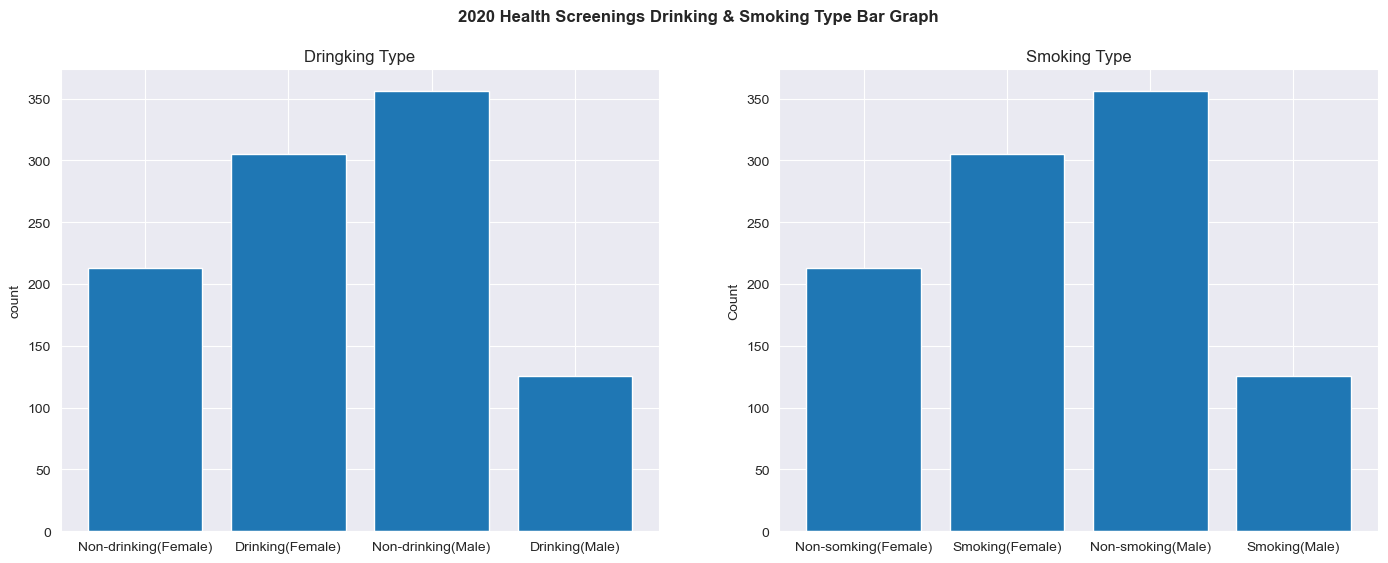

In [10]:
# 성별 음주 여부 및 흡연 상태 막대 그래프

fig = plt.figure(figsize=(17, 6))  # 그래프 크기 지정 및 그림 객체 생성
fig.suptitle('2020 Health Screenings Drinking & Smoking Type Bar Graph', fontweight='bold')
index = np.arange(4)  # x축 눈금 개수를 배열로 생성하고 index에 저장

# 2) 첫 번째 서브플롯 설정
fig.add_subplot(1, 2, 1)  # 1행 2열의 서브플롯 중 첫 번째 서브플롯을 생성
# 첫 번째 서브플롯에 그려질 음주 여부 데이터 개수 (인원)을 bar() 함수를 이용하여 지정.
plt.bar(index, drinking['count'])
plt.title('Dringking Type')
plt.ylabel('count')
# x축 눈금 이름을 지정
plt.xticks(index, ['Non-drinking(Female)', 'Drinking(Female)', 'Non-drinking(Male)', 'Drinking(Male)'])

# 3) 두 번째 서브플롯설정
fig.add_subplot(1, 2, 2)  # 1행 2열의 서브플롯 중 두 번쨰 서브플롯을 생성
# 두 번쨰 서브플롯에 그려질 흡연 상태 데이터 개수 (인원)을 bar() 함수를 이용하여 지정.
plt.bar(index, drinking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
# x 축 눈금 이름을 지정
plt.xticks(index, ['Non-somking(Female)', 'Smoking(Female)', 'Non-smoking(Male)', 'Smoking(Male)'])
plt.show()

### 3. 시본 막대 그래프 그리기 <-- 시본으로 작업

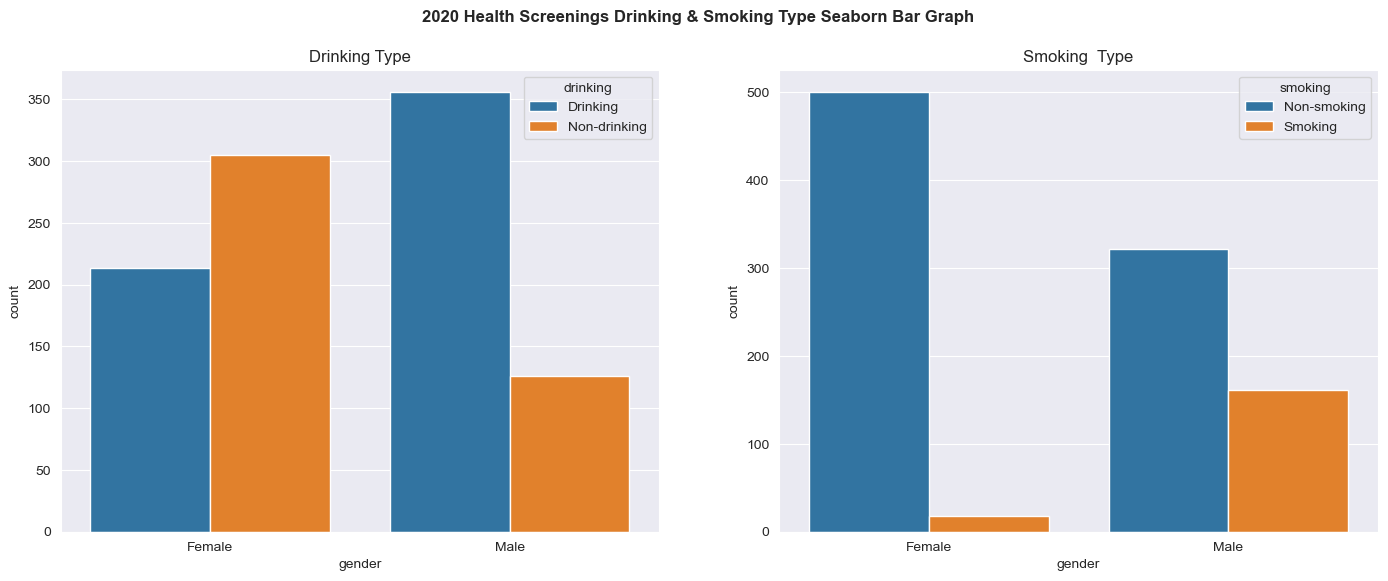

In [11]:
# 성별 음주 여부 및 흡연 상태 시본 막대 그래프

fig = plt.figure(figsize=(17, 6))

# 1행 2열의 서브플롯 생성
area1 = fig.add_subplot(1, 2, 1)
area2 = fig.add_subplot(1, 2, 2)

# barplot() 함수를 이용해서 x축에 성별, y축에 음주여부 개수 (인원), hue 에 성별 음주 여부를 할당하여 첫 번째 서브플롯에 할당
ax1 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=area1)   # hue='drinking'을 사용하여 음주 여부에 따라 색상을 다르게 표시합니다.
# barplot() 함수를 이용하여 x축에 성별, y축에 흡연상태 개수 (인원), hue에 성별 흡연상태 그룹별 데이터를 할당하여
# 두 번째 서브플롯에 할당
ax2 = sns.barplot(data=smoking, x='gender', y='count', hue='smoking', ax=area2) # hue='smoking'을 사용하여 흡연 상태에 따라 색상을 다르게 표시합니다.

fig.suptitle('2020 Health Screenings Drinking & Smoking Type Seaborn Bar Graph', fontweight='bold')
area1.set_title('Drinking Type')
area2.set_title('Smoking  Type')

plt.show()

`ax=area1`는 `seaborn`의 `barplot()` 함수에 사용되는 매개변수입니다. 여기서 `ax` 매개변수는 막대 그래프가 그려질 `matplotlib`의 축(Axes) 객체를 지정합니다. 즉, `ax=area1`은 `barplot()` 함수로 생성된 막대 그래프가 `area1`이라는 축(Axes) 객체에 그려지도록 지정하는 것입니다.

위 코드에서 `area1 = fig.add_subplot(1, 2, 1)`과 `area2 = fig.add_subplot(1, 2, 2)`는 전체 그림(Figure) 내에 두 개의 서브플롯(Axes)을 생성하고, 각각 `area1`과 `area2`로 참조합니다. 따라서 `ax=area1`은 첫 번째 서브플롯에, `ax=area2`는 두 번째 서브플롯에 해당 막대 그래프를 그리라는 지시를 내리는 것이며, 이를 통해 하나의 창(Figure) 안에 여러 개의 그래프를 나란히 배치할 수 있습니다.

이 방식을 사용함으로써, 다양한 데이터 세트를 비교하거나 서로 다른 종류의 정보를 하나의 시각적 컨텍스트 안에서 동시에 표현할 수 있어 데이터 분석 과정에서 매우 유용하게 활용됩니다.